# Mengimport Data

In [2]:
import pandas as pd

data = pd.read_excel("C:/Users/ACER/Downloads/data bankkk.xlsx")
data_chny = pd.read_csv("C:/Users/ACER/Downloads/Data Historis CNY_IDR (1).csv")

In [3]:
data.head()

,Tanggal,Kurs (USD),Kurs (Yuan),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,NPL,LDR
0,2015-01-01,12625.0,NaN,300508.225476,47.266000,53.9270,638.083810,1.023889,1.803182,2.369347,88.477513
1,2015-02-01,12863.0,NaN,300070.301140,50.608947,53.0600,632.131250,1.037368,1.815333,2.456301,88.255119
2,2015-03-01,13084.0,NaN,298518.658523,47.783636,53.0600,606.120909,0.981364,1.870000,2.402279,87.583926
3,2015-04-01,12937.0,NaN,299954.805787,54.444762,52.9400,593.638636,0.988571,1.894762,2.482560,87.937973
4,2015-05-01,13332.0,NaN,302691.669662,59.274500,52.8515,599.990000,0.944500,1.974211,2.584217,88.724484


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       112 non-null    datetime64[ns]
 1   Kurs (USD)    112 non-null    float64       
 2   Kurs (Yuan)   0 non-null      float64       
 3   ULN           112 non-null    float64       
 4   Minyak        112 non-null    float64       
 5   Batubara      112 non-null    float64       
 6   CPO           112 non-null    float64       
 7   Kopi Robusta  112 non-null    float64       
 8   Karet         112 non-null    float64       
 9   NPL           112 non-null    float64       
 10  LDR           112 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 9.8 KB


In [5]:
data_chny.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,14/08/2024,"2.194,91","2.201,93","2.201,93","2.190,48",NaN,"-0,32%"
1,13/08/2024,"2.201,93","2.224,86","2.224,86","2.196,56",NaN,"-1,03%"
2,12/08/2024,"2.224,86","2.221,90","2.227,70","2.220,18",NaN,"0,18%"
3,09/08/2024,"2.220,80","2.214,42","2.222,76","2.213,36",NaN,"0,31%"
4,08/08/2024,"2.213,83","2.234,00","2.235,69","2.214,91",NaN,"-0,87%"


In [6]:
data_chny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     2510 non-null   object 
 1   Terakhir    2510 non-null   object 
 2   Pembukaan   2510 non-null   object 
 3   Tertinggi   2510 non-null   object 
 4   Terendah    2510 non-null   object 
 5   Vol.        0 non-null      float64
 6   Perubahan%  2510 non-null   object 
dtypes: float64(1), object(6)
memory usage: 137.4+ KB


# Membersihkan Data

In [8]:
data_chny['Tanggal'] = pd.to_datetime(data_chny['Tanggal'])

C:\Users\ACER\AppData\Local\Temp\ipykernel_6988\2794307237.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_chny['Tanggal'] = pd.to_datetime(data_chny['Tanggal'])


In [9]:
def convert_to_float(x):
    return float(x.replace('.', '').replace(',', '.'))

data_chny['Terakhir'] = data_chny['Terakhir'].apply(convert_to_float)
data_chny['Pembukaan'] = data_chny['Pembukaan'].apply(convert_to_float)
data_chny['Tertinggi'] = data_chny['Tertinggi'].apply(convert_to_float)
data_chny['Terendah'] = data_chny['Terendah'].apply(convert_to_float)

In [10]:
data_chny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Tanggal     2510 non-null   datetime64[ns]
 1   Terakhir    2510 non-null   float64       
 2   Pembukaan   2510 non-null   float64       
 3   Tertinggi   2510 non-null   float64       
 4   Terendah    2510 non-null   float64       
 5   Vol.        0 non-null      float64       
 6   Perubahan%  2510 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 137.4+ KB


In [11]:
data_chny['Mean Kurs'] = data_chny[['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah']].mean(axis=1)
data_chny.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%,Mean Kurs
0,2024-08-14,2194.91,2201.93,2201.93,2190.48,NaN,"-0,32%",2197.3125
1,2024-08-13,2201.93,2224.86,2224.86,2196.56,NaN,"-1,03%",2212.0525
2,2024-08-12,2224.86,2221.90,2227.70,2220.18,NaN,"0,18%",2223.6600
3,2024-08-09,2220.80,2214.42,2222.76,2213.36,NaN,"0,31%",2217.8350
4,2024-08-08,2213.83,2234.00,2235.69,2214.91,NaN,"-0,87%",2224.6075


In [12]:
# Truncate kolom 'Tanggal' ke awal bulan
data_chny['Tanggal'] = data_chny['Tanggal'].dt.to_period('M').dt.to_timestamp()

In [13]:
data_kurs_china = data_chny.groupby("Tanggal")["Mean Kurs"].mean().reset_index()
data_kurs_china

,Tanggal,Mean Kurs
0,2015-01-01,2020.052386
1,2015-02-01,2039.518625
2,2015-03-01,2092.427500
3,2015-04-01,2086.650000
4,2015-05-01,2115.075238
...,...,...
111,2024-04-01,2215.198636
112,2024-05-01,2221.250000
113,2024-06-01,2251.790500
114,2024-07-01,2237.008804


In [14]:
df = pd.merge(data, data_kurs_china[['Tanggal', 'Mean Kurs']], on='Tanggal', how='inner').drop("Kurs (Yuan)", axis=1).rename(columns={
    'Mean Kurs':'Kurs (Yuan)'
})

df.head()

,Tanggal,Kurs (USD),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,NPL,LDR,Kurs (Yuan)
0,2015-01-01,12625.0,300508.225476,47.266000,53.9270,638.083810,1.023889,1.803182,2.369347,88.477513,2020.052386
1,2015-02-01,12863.0,300070.301140,50.608947,53.0600,632.131250,1.037368,1.815333,2.456301,88.255119,2039.518625
2,2015-03-01,13084.0,298518.658523,47.783636,53.0600,606.120909,0.981364,1.870000,2.402279,87.583926,2092.427500
3,2015-04-01,12937.0,299954.805787,54.444762,52.9400,593.638636,0.988571,1.894762,2.482560,87.937973,2086.650000
4,2015-05-01,13332.0,302691.669662,59.274500,52.8515,599.990000,0.944500,1.974211,2.584217,88.724484,2115.075238


In [15]:
rentang_waktu = df['Tanggal'] < '2020-12-01'

df.loc[rentang_waktu, "Kopi Robusta"] = df.loc[rentang_waktu, "Kopi Robusta"]*100
df.head()

,Tanggal,Kurs (USD),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,NPL,LDR,Kurs (Yuan)
0,2015-01-01,12625.0,300508.225476,47.266000,53.9270,638.083810,102.388889,1.803182,2.369347,88.477513,2020.052386
1,2015-02-01,12863.0,300070.301140,50.608947,53.0600,632.131250,103.736842,1.815333,2.456301,88.255119,2039.518625
2,2015-03-01,13084.0,298518.658523,47.783636,53.0600,606.120909,98.136364,1.870000,2.402279,87.583926,2092.427500
3,2015-04-01,12937.0,299954.805787,54.444762,52.9400,593.638636,98.857143,1.894762,2.482560,87.937973,2086.650000
4,2015-05-01,13332.0,302691.669662,59.274500,52.8515,599.990000,94.450000,1.974211,2.584217,88.724484,2115.075238


# Mengevaluasi Data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       112 non-null    datetime64[ns]
 1   Kurs (USD)    112 non-null    float64       
 2   ULN           112 non-null    float64       
 3   Minyak        112 non-null    float64       
 4   Batubara      112 non-null    float64       
 5   CPO           112 non-null    float64       
 6   Kopi Robusta  112 non-null    float64       
 7   Karet         112 non-null    float64       
 8   NPL           112 non-null    float64       
 9   LDR           112 non-null    float64       
 10  Kurs (Yuan)   112 non-null    float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 9.8 KB


In [18]:
df.isnull().sum()

Tanggal         0
Kurs (USD)      0
ULN             0
Minyak          0
Batubara        0
CPO             0
Kopi Robusta    0
Karet           0
NPL             0
LDR             0
Kurs (Yuan)     0
dtype: int64

In [19]:
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [22]:
col = df.drop("Tanggal", axis=1).columns.tolist()
col

['Kurs (USD)',
 'ULN',
 'Minyak',
 'Batubara',
 'CPO',
 'Kopi Robusta',
 'Karet',
 'NPL',
 'LDR',
 'Kurs (Yuan)']

## Cek Distribusi Data dan Outliers

In [24]:
def visualize_by(column):
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    sns.histplot(df, x=column, ax=axs[0])
    axs[0].set_title(f'Distribusi Data {column}')

    sns.boxplot(df, y=column, ax=axs[1])
    axs[1].set_title(f'Distribusi Data {column}')

    fig.tight_layout()
    plt.show()

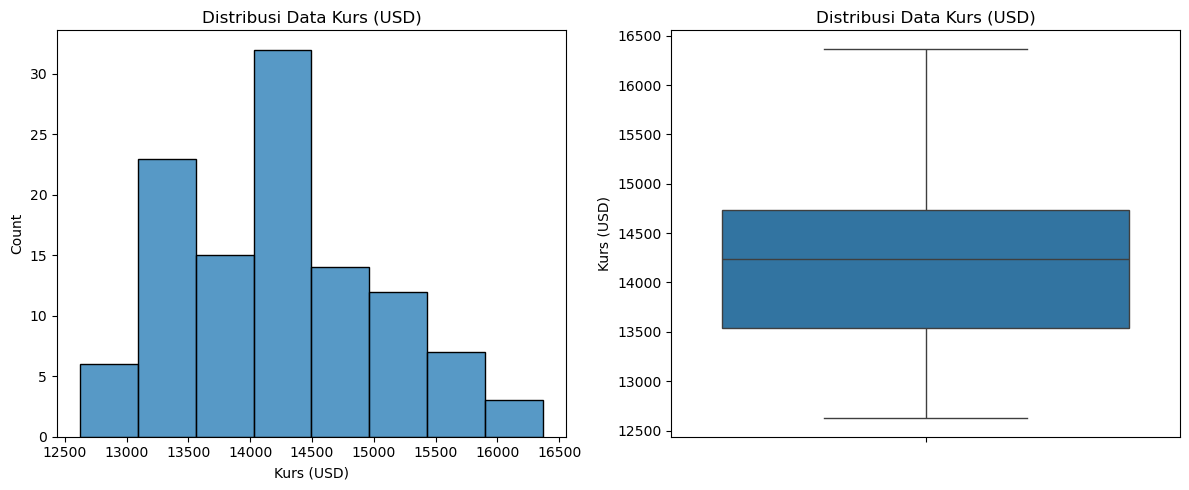

In [25]:
visualize_by("Kurs (USD)")

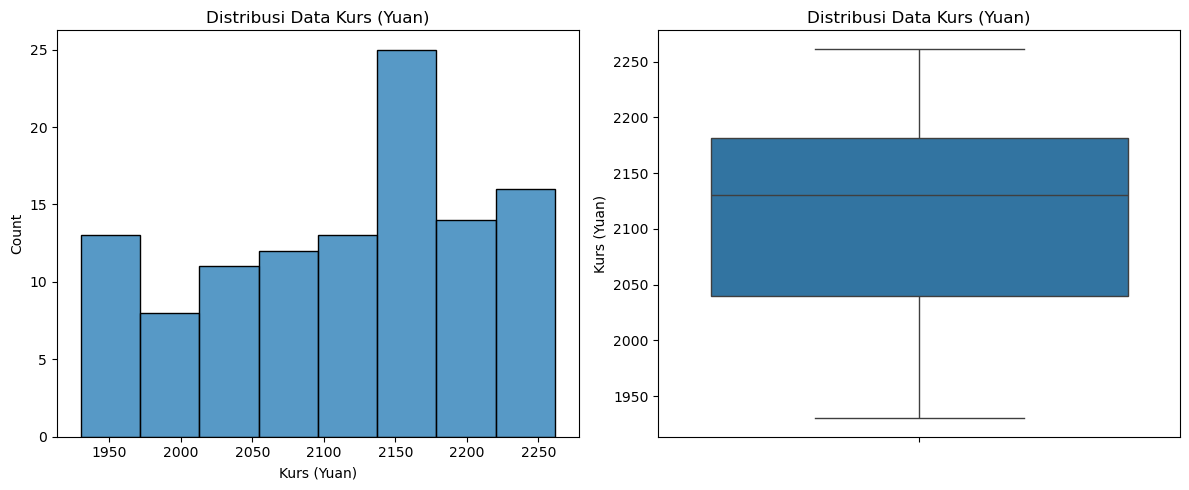

In [26]:
visualize_by("Kurs (Yuan)")

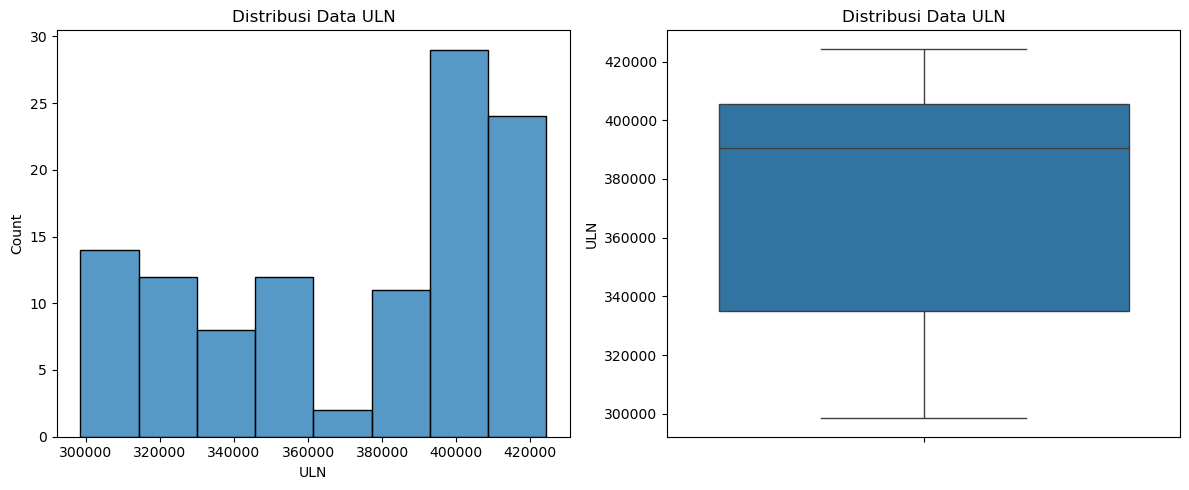

In [27]:
visualize_by("ULN")

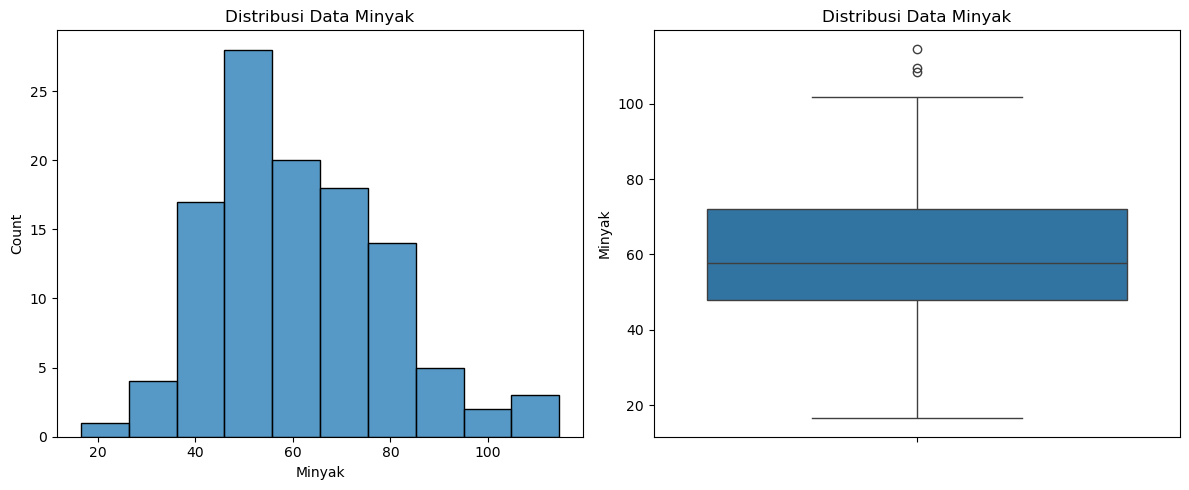

In [28]:
visualize_by("Minyak")

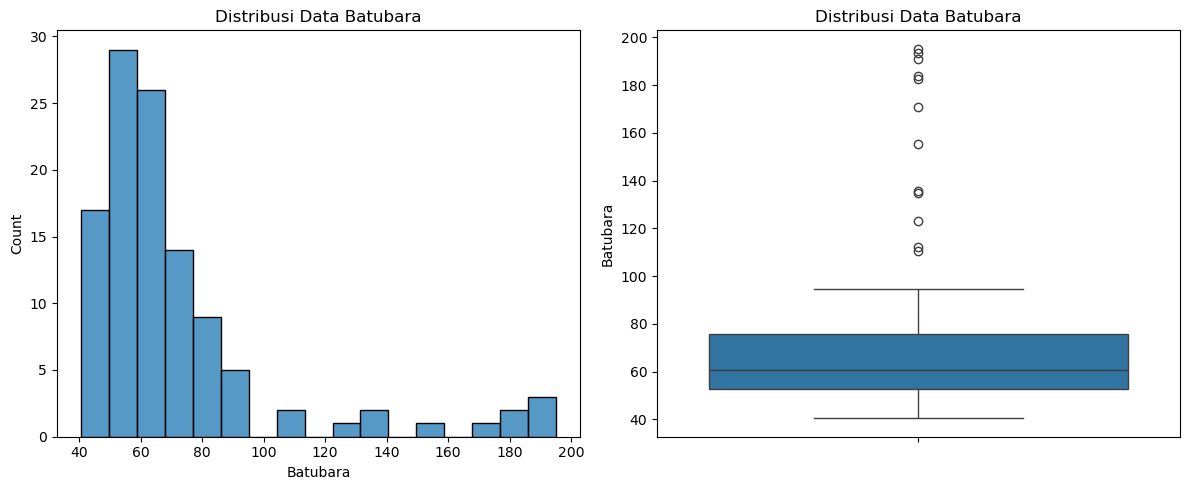

In [29]:
visualize_by("Batubara")

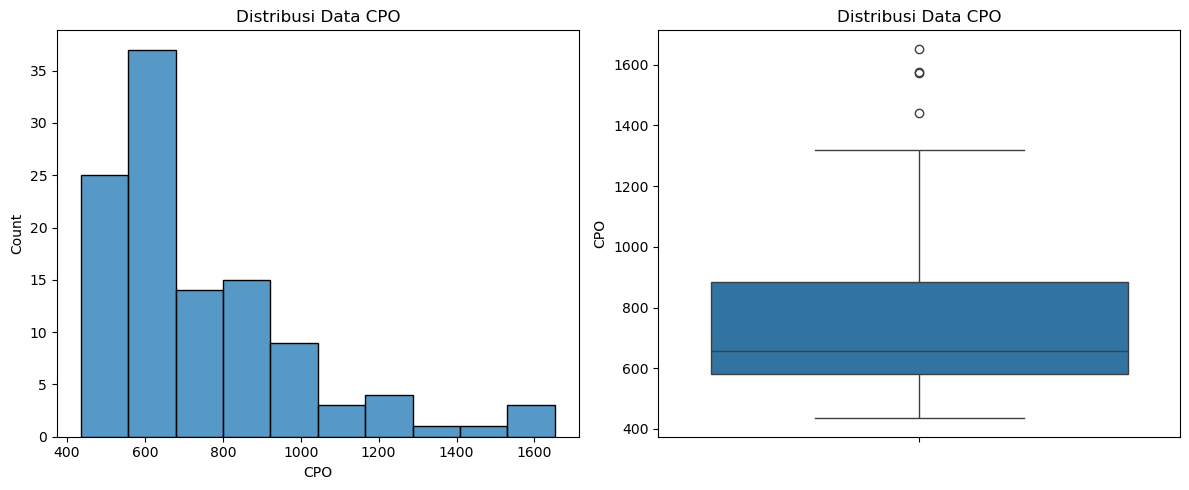

In [30]:
visualize_by("CPO")

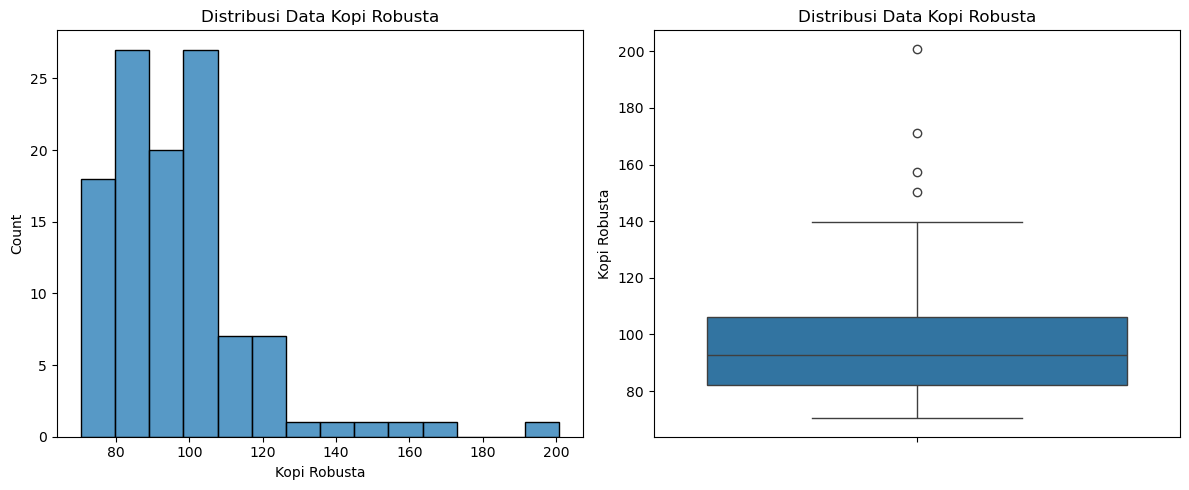

In [31]:
visualize_by("Kopi Robusta")

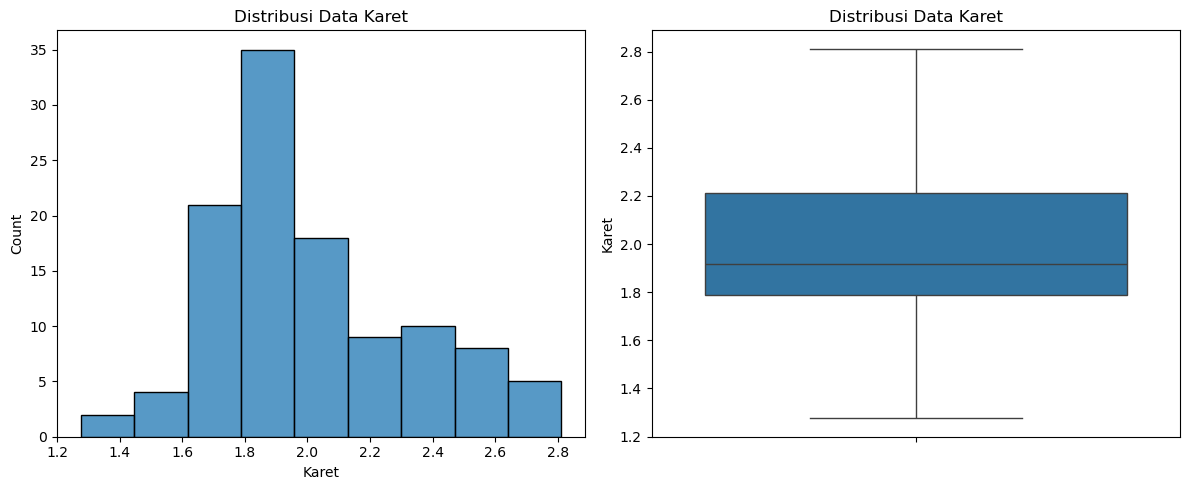

In [32]:
visualize_by("Karet")

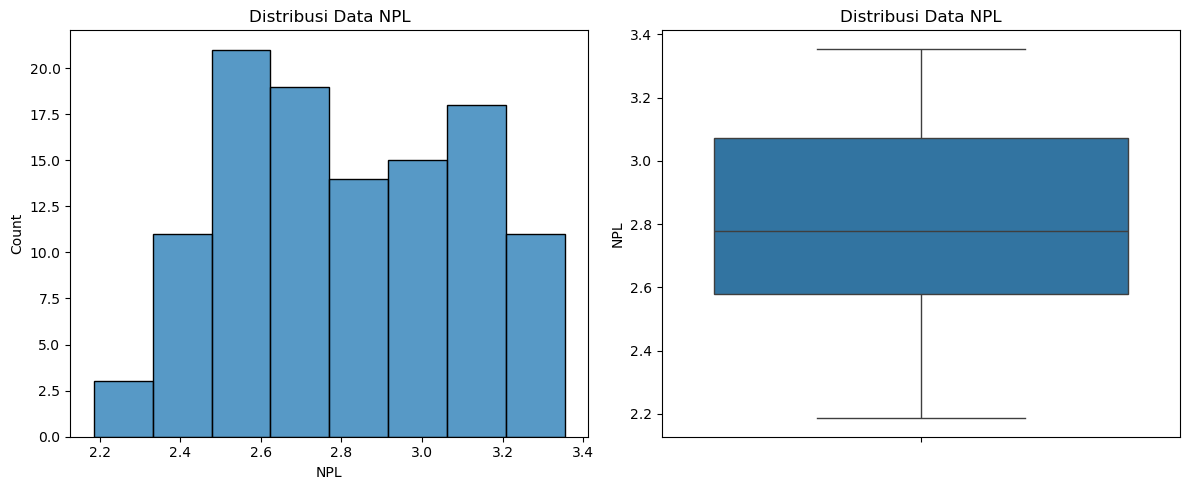

In [33]:
visualize_by("NPL")

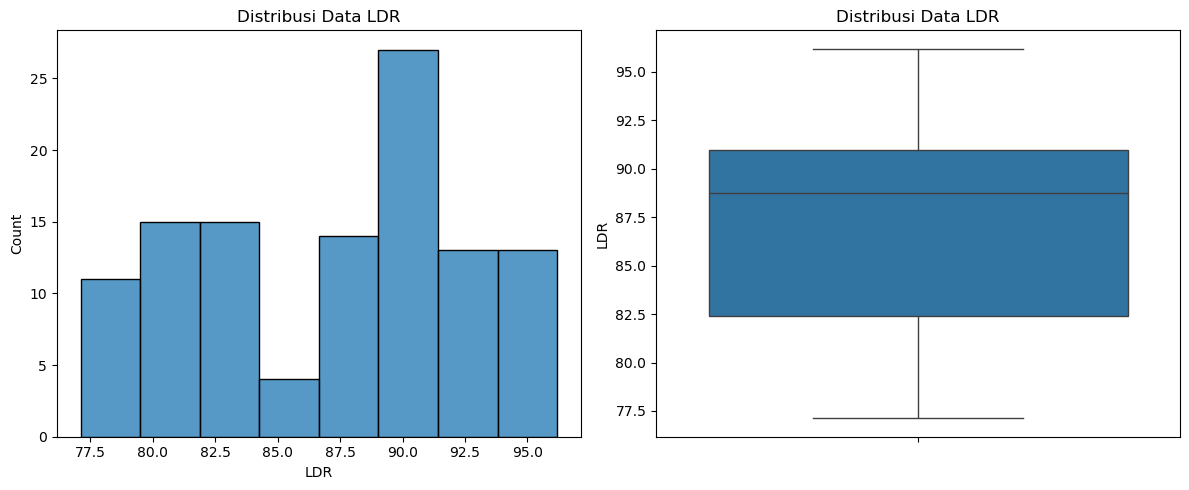

In [34]:
visualize_by("LDR")

## Analisis Data Time Series

In [36]:
def monthly_data(column):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.lineplot(data=df, x='Tanggal', y=column, ax=axs[0])
    axs[0].set_title(f'Perkembangan Data {column}')
    axs[0].set_xlabel("Tanggal")
    axs[0].set_ylabel(column)

    sns.lineplot(data=df, x='Tanggal', y=column, ax=axs[1])
    axs[1].set_title(f'Perkembangan Data {column} Ketika Covid')
    axs[1].set_xlabel("Tanggal")
    axs[1].set_ylabel(column)
    axs[1].axvline(pd.to_datetime('2020-03-01'), color='red', linestyle='--', label='Covid-19')
    axs[1].legend()  # Tambahkan legenda untuk garis vertikal
    
    fig.tight_layout()
    plt.show()

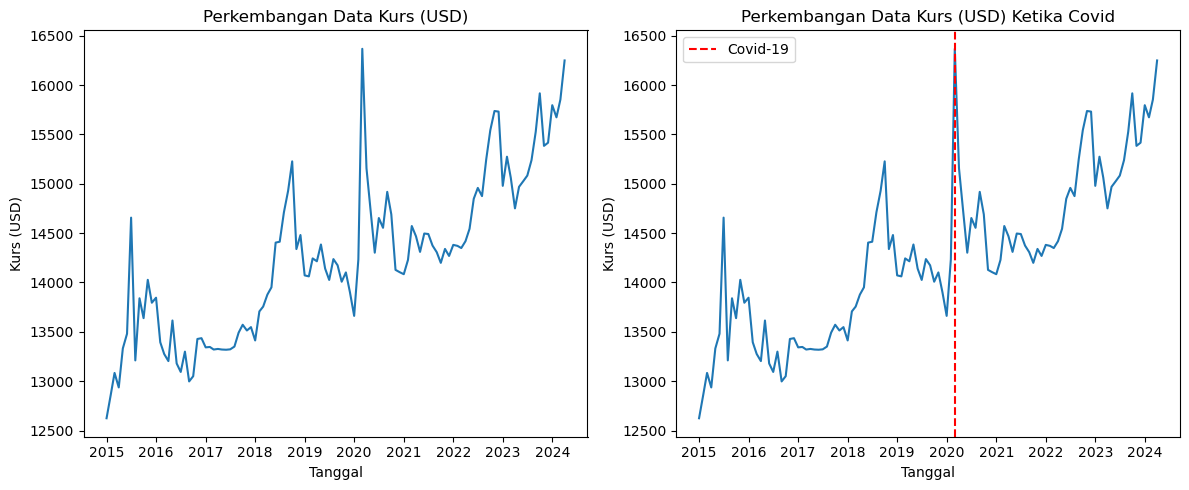

In [37]:
monthly_data("Kurs (USD)")

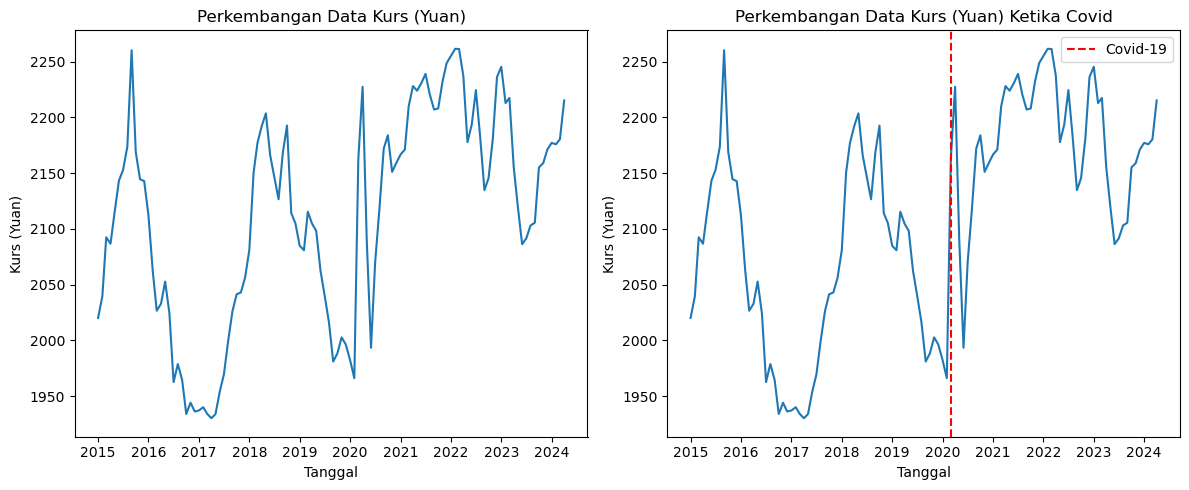

In [38]:
monthly_data("Kurs (Yuan)")

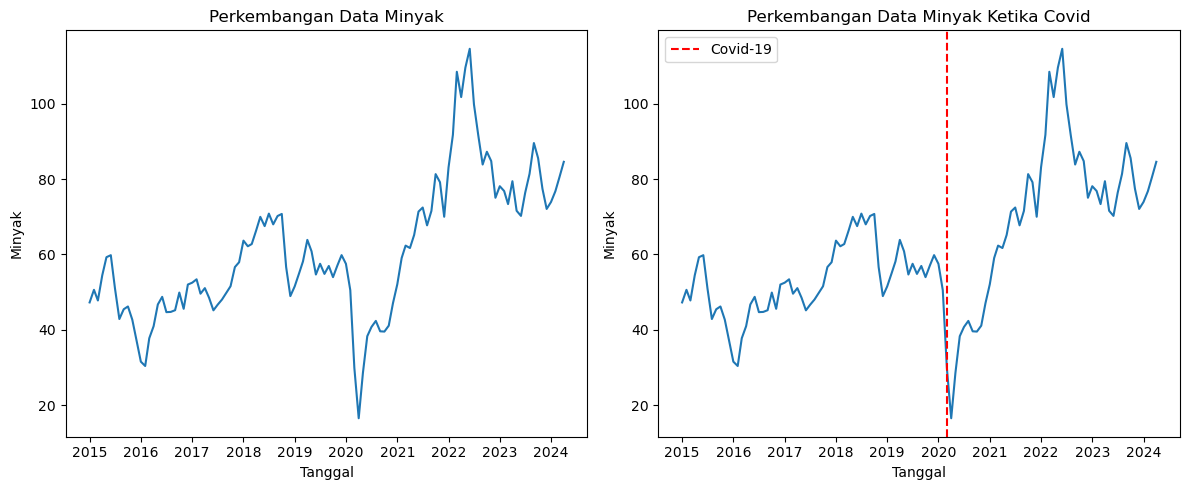

In [39]:
monthly_data("Minyak")

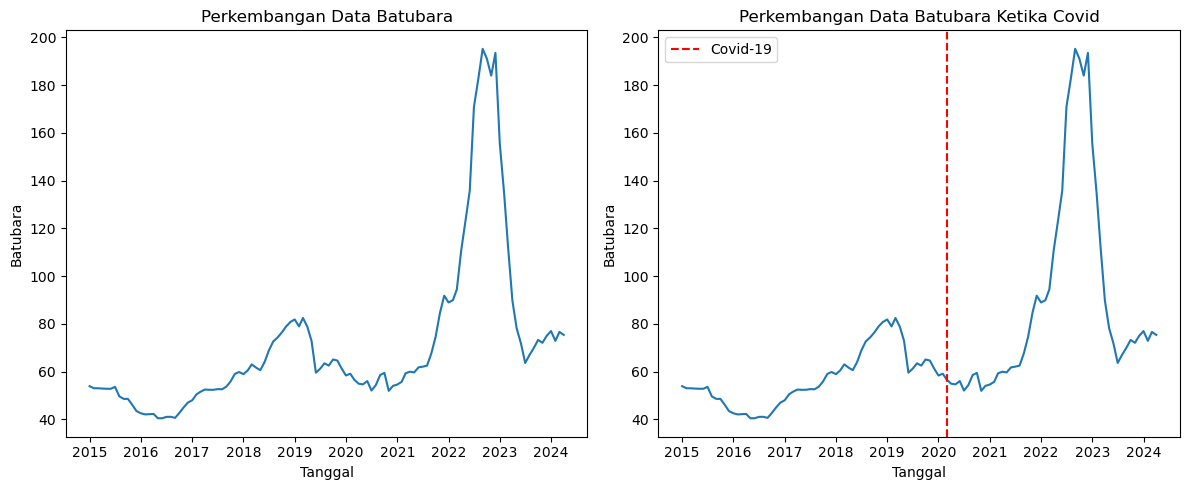

In [40]:
monthly_data("Batubara")

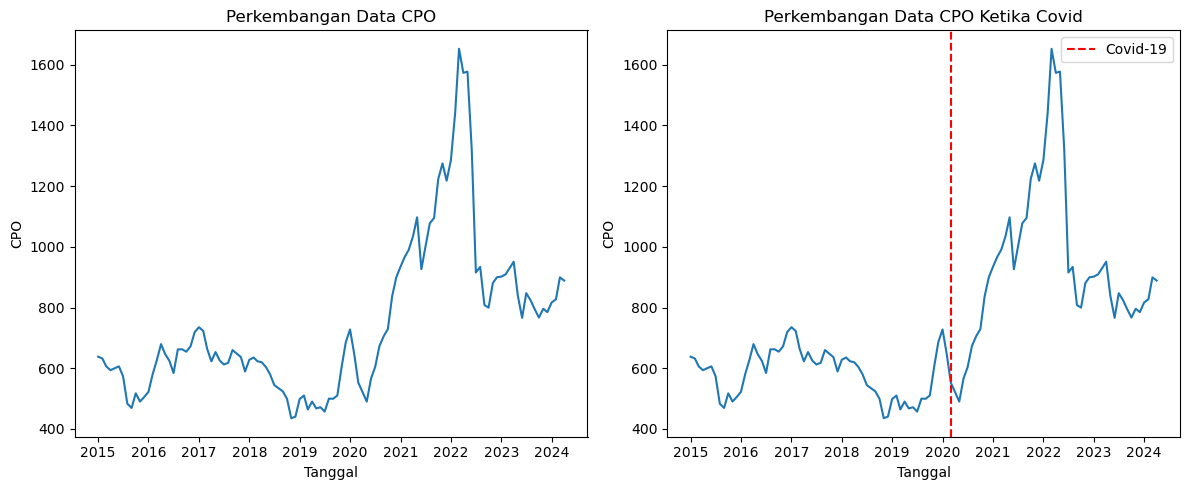

In [41]:
monthly_data("CPO")

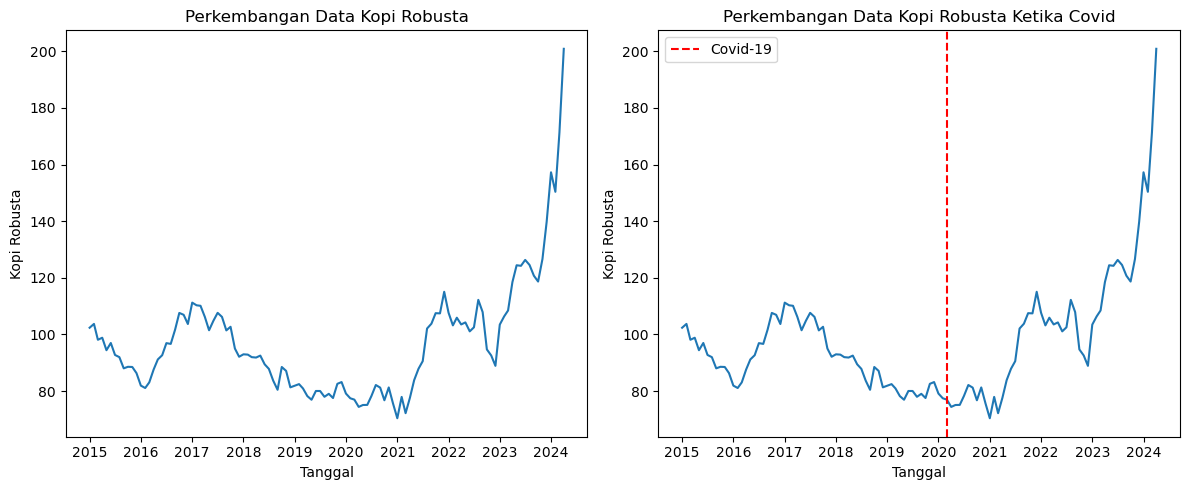

In [42]:
monthly_data("Kopi Robusta")

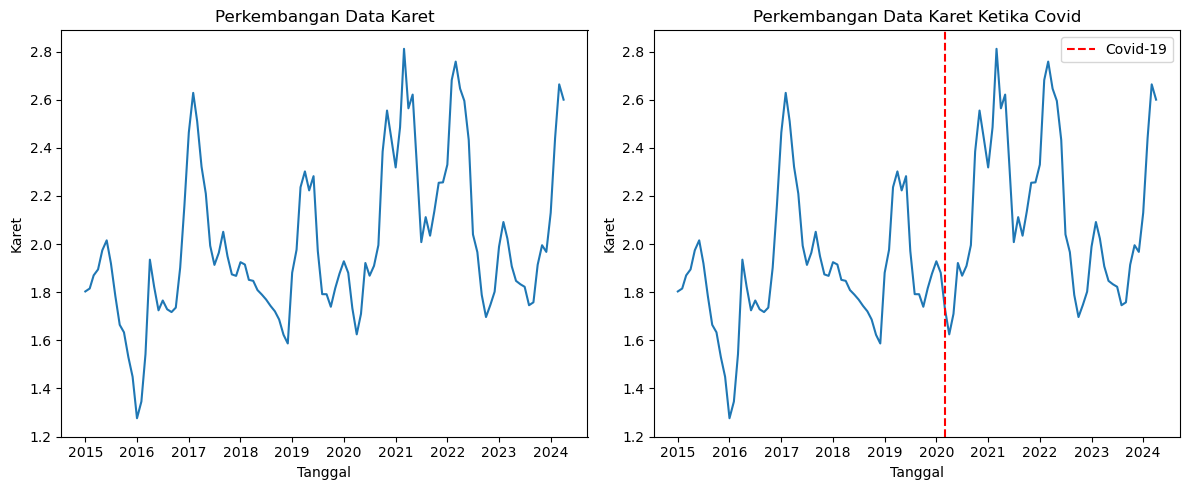

In [43]:
monthly_data("Karet")

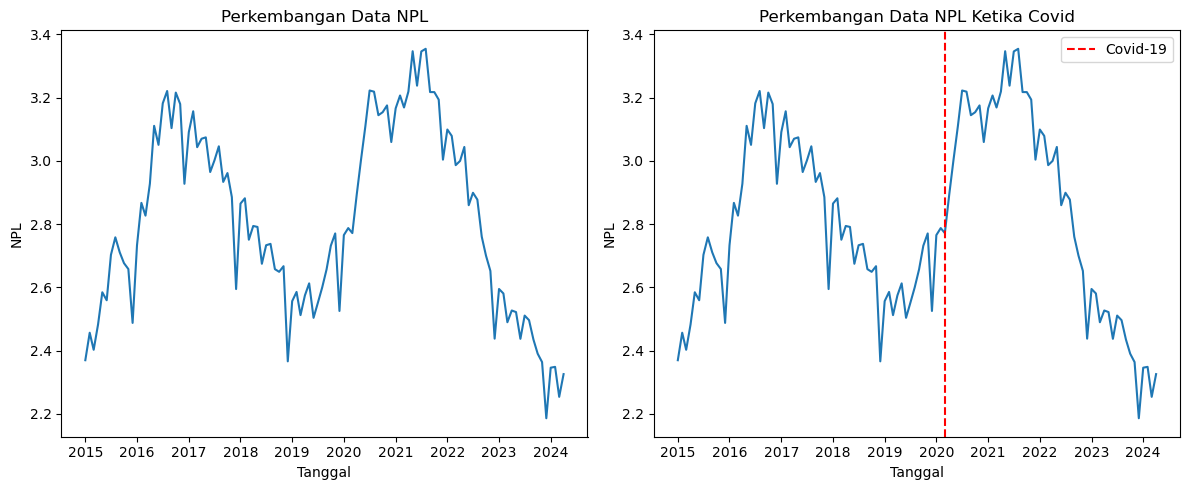

In [44]:
monthly_data("NPL")

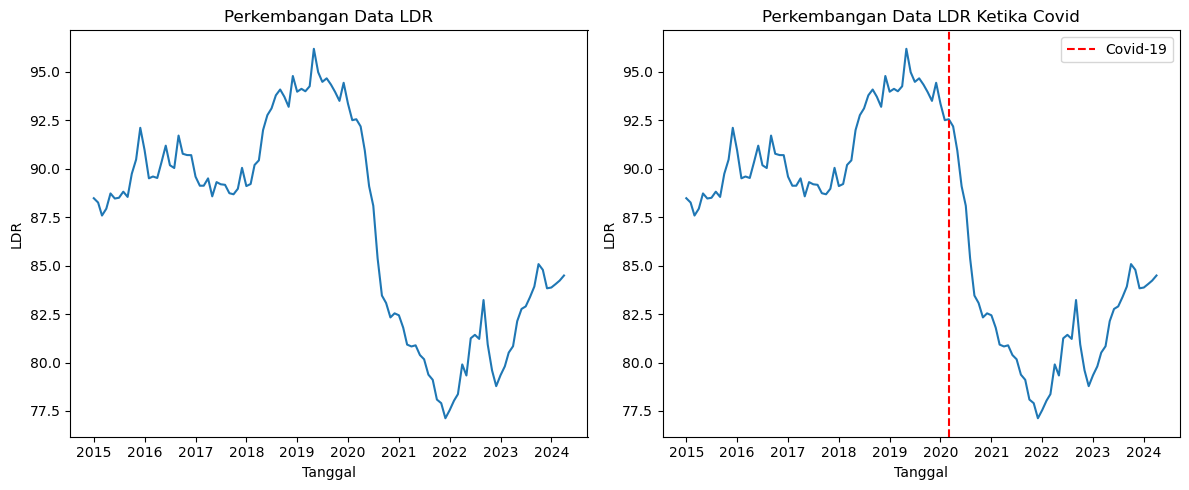

In [45]:
monthly_data("LDR")

## Analisis Korelasi Antar Variabel

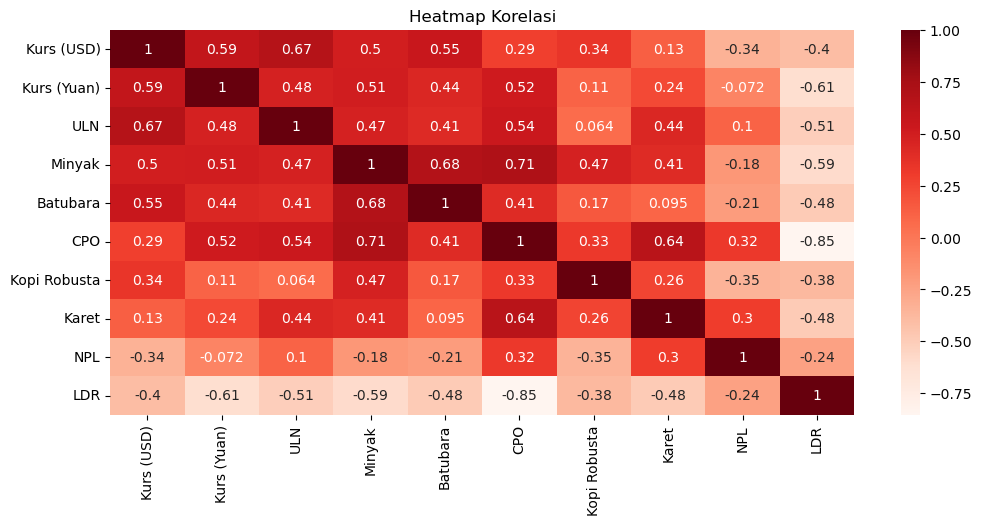

In [47]:
urutan = ['Kurs (USD)', 'Kurs (Yuan)', 'ULN', 'Minyak', 'Batubara', 'CPO', 'Kopi Robusta', 'Karet', 'NPL', 'LDR']
plt.figure(figsize=(12,5))
sns.heatmap(data = df[urutan].corr(), annot=True, cmap='Reds')
plt.title("Heatmap Korelasi")
plt.show()

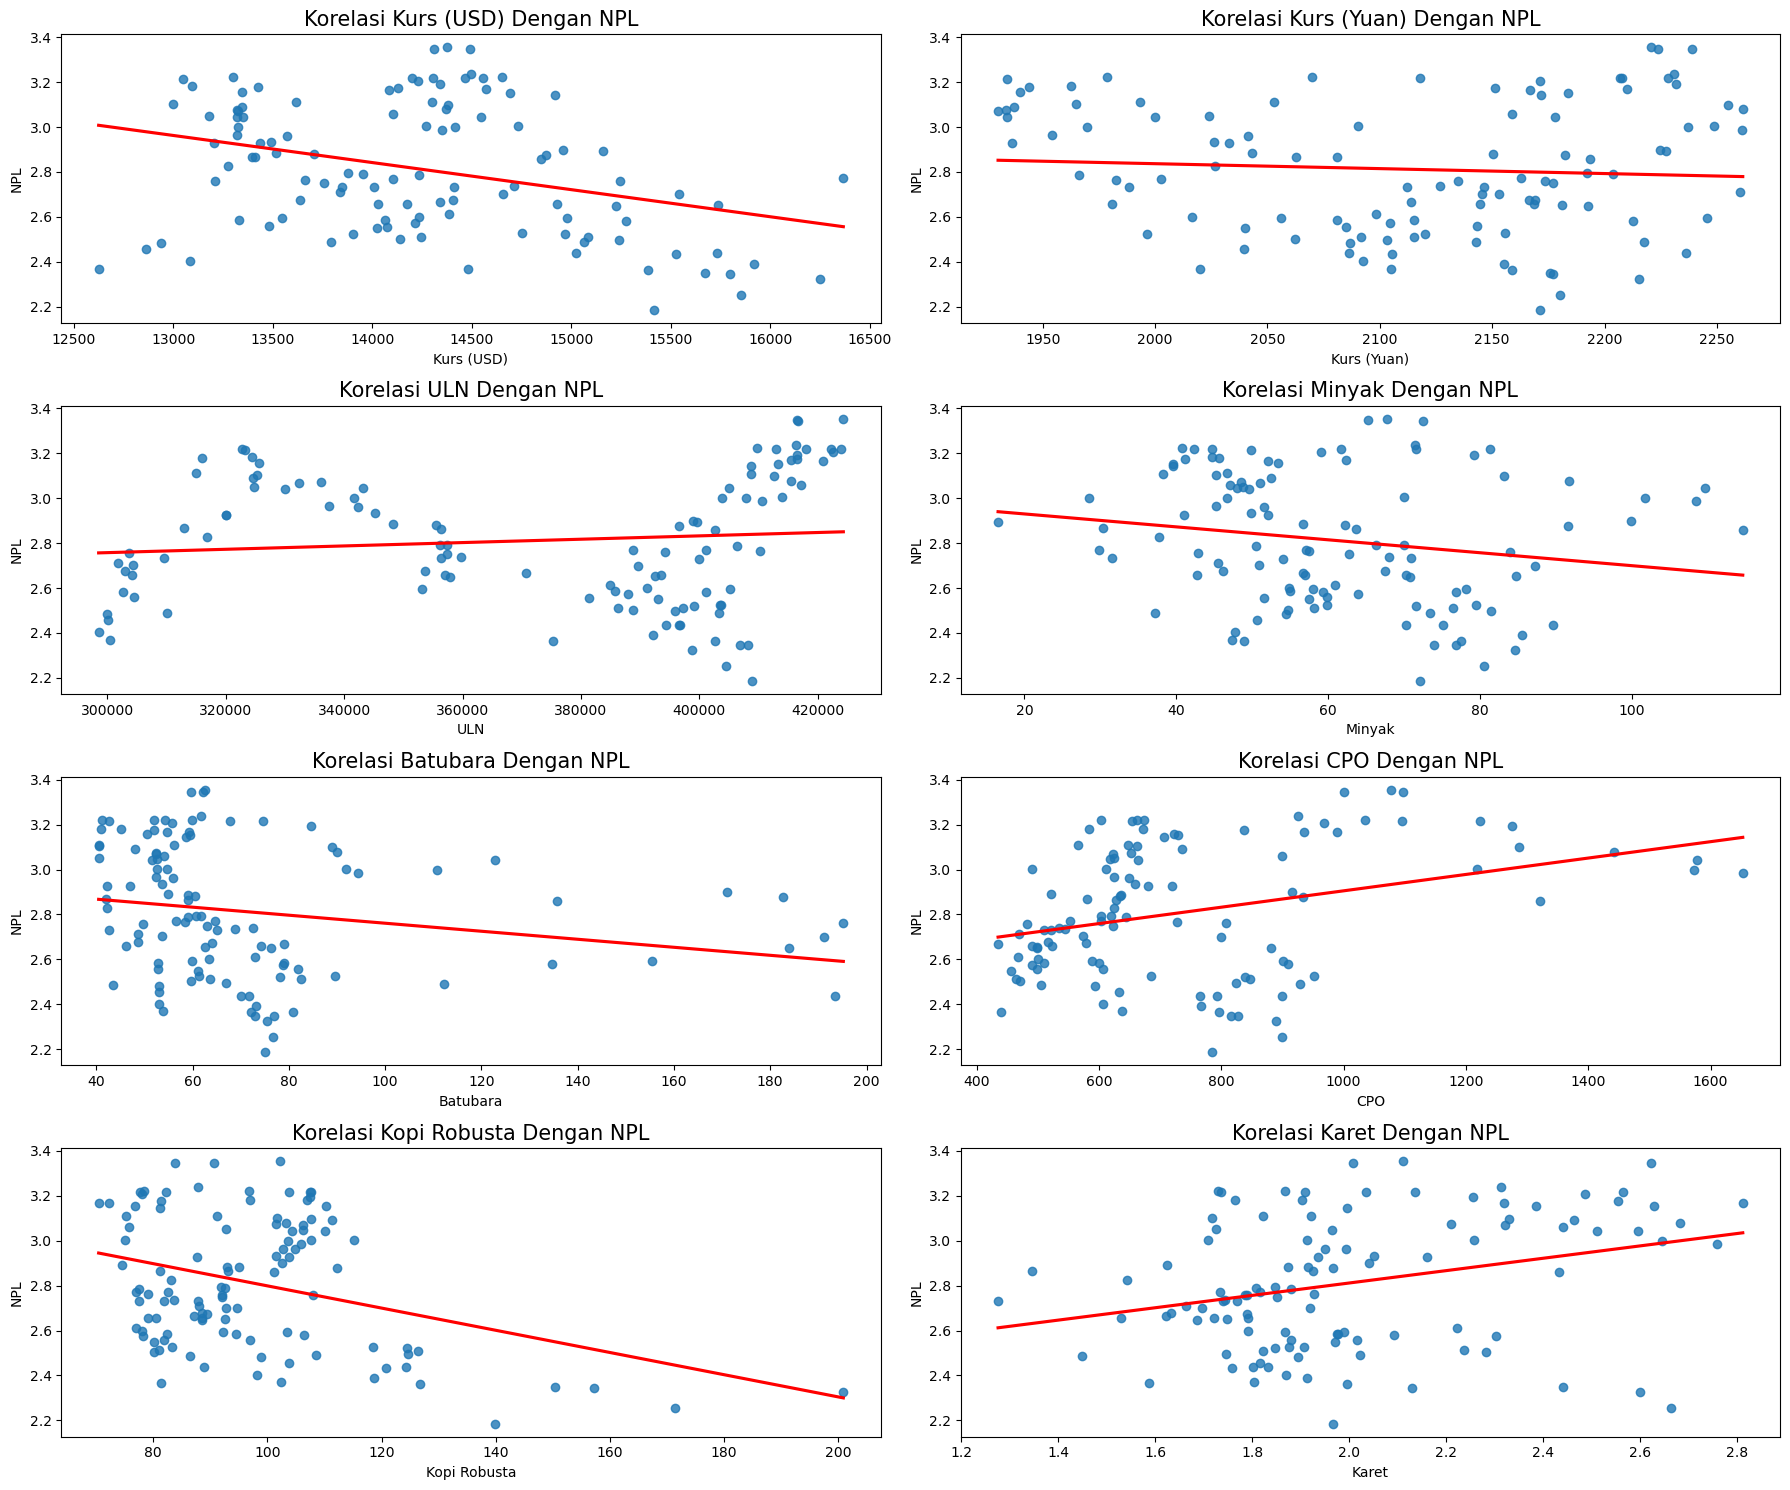

In [48]:
kolom = ['Kurs (USD)', 'Kurs (Yuan)', 'ULN', 'Minyak', 'Batubara', 'CPO', 'Kopi Robusta', 'Karet']
def corr(df, columns):
    fig, axs = plt.subplots(4, 2, figsize=(18, 15))
    
    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2
        sns.regplot(data=df, x=column, y='NPL', ax=axs[row, col], ci=None, line_kws={"color": "red"})
        axs[row, col].set_title(f'Korelasi {column} Dengan NPL', fontsize=15)
    
    plt.tight_layout()
    plt.show()

corr(df, kolom)

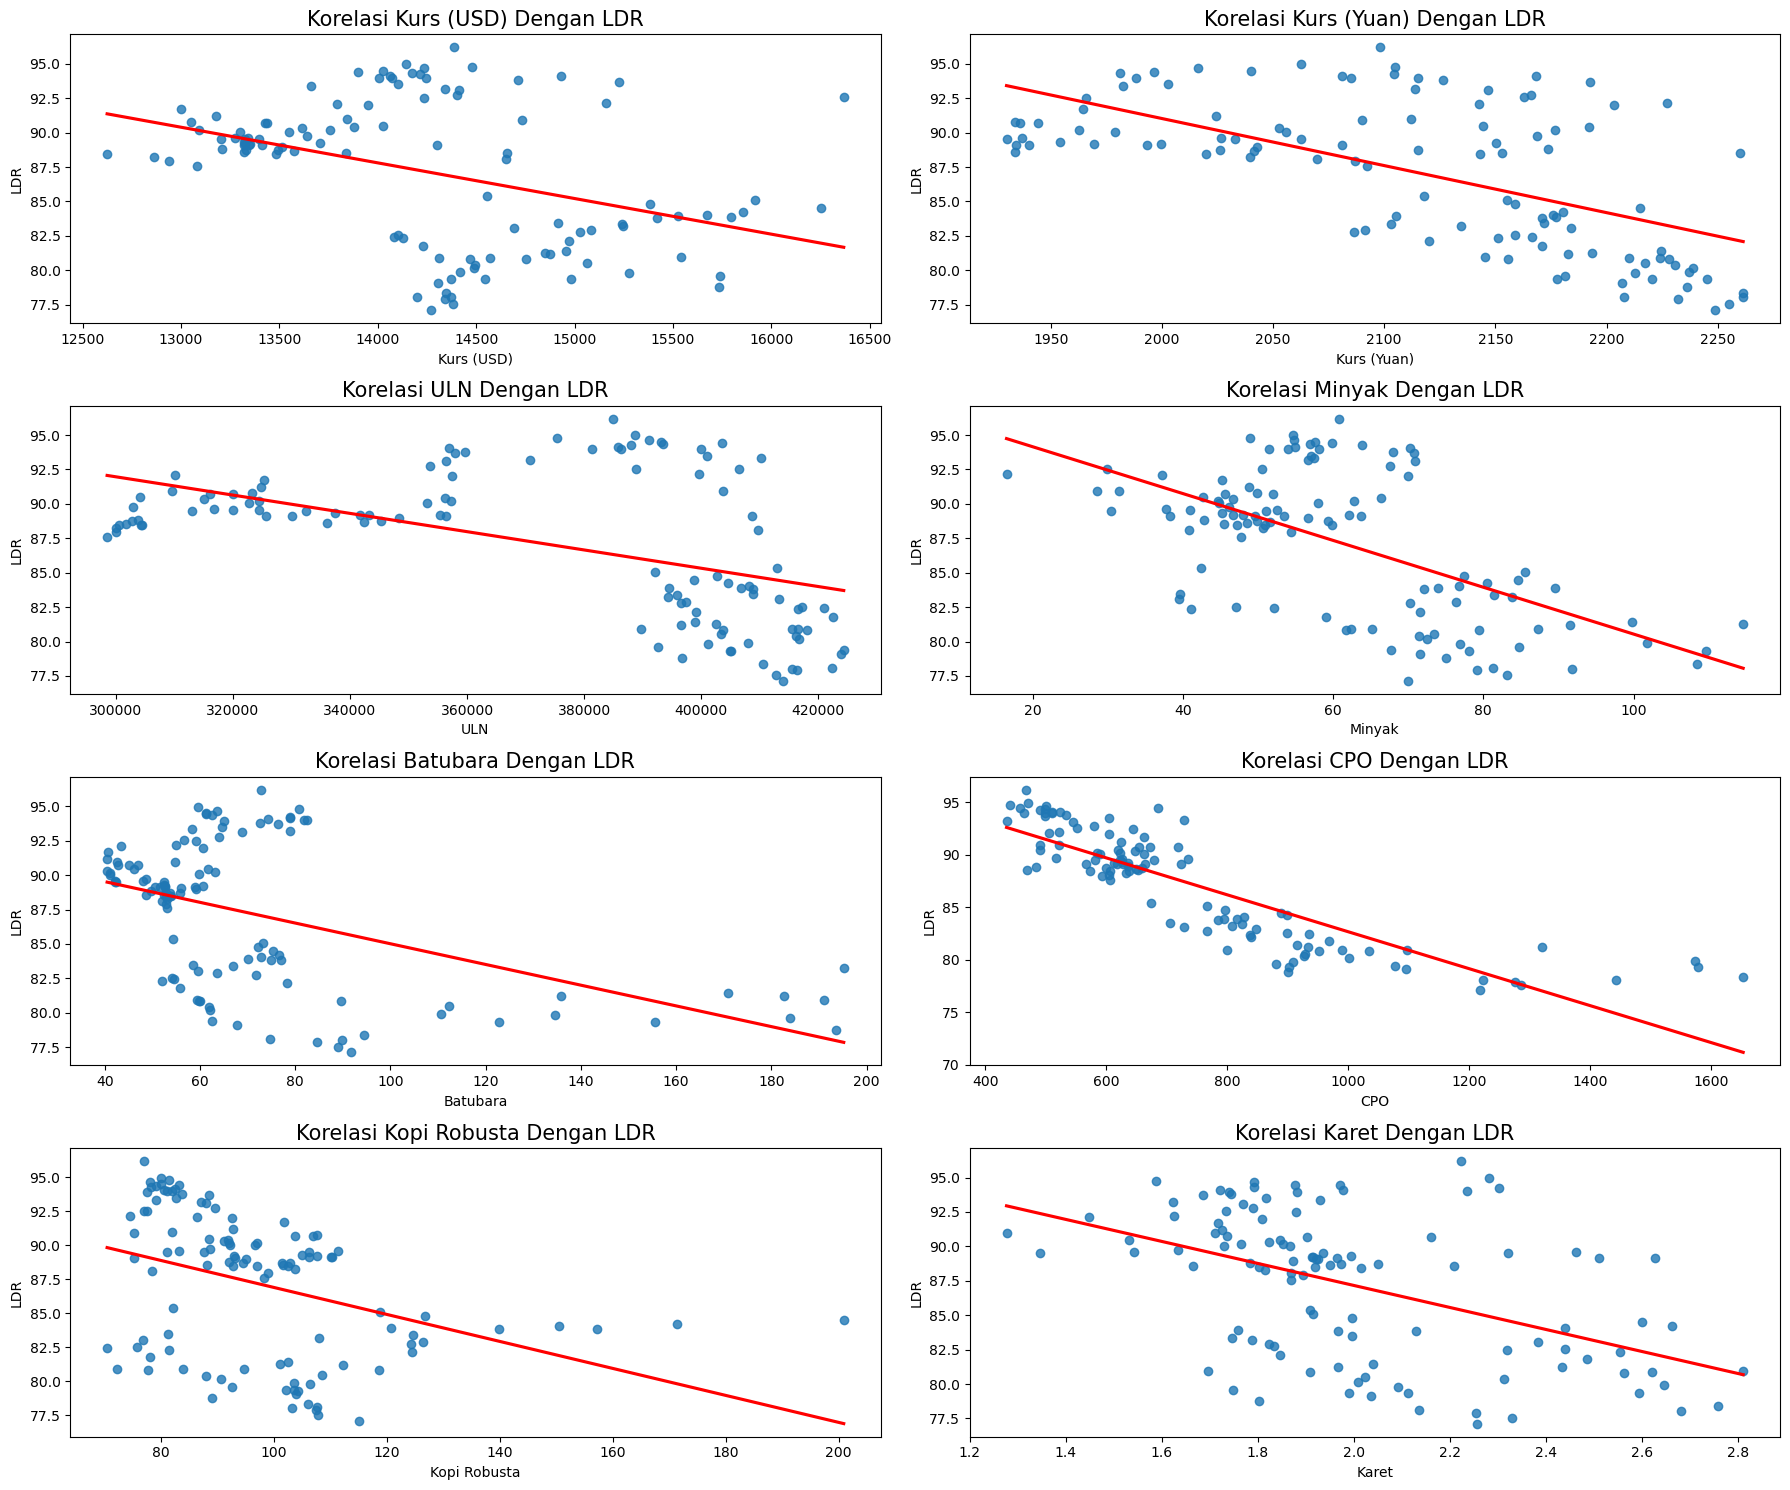

In [49]:
kolom = ['Kurs (USD)', 'Kurs (Yuan)', 'ULN', 'Minyak', 'Batubara', 'CPO', 'Kopi Robusta', 'Karet']
def corr(df, columns):
    fig, axs = plt.subplots(4, 2, figsize=(18, 15))
    
    for i, column in enumerate(columns):
        row = i // 2
        col = i % 2
        sns.regplot(data=df, x=column, y='LDR', ax=axs[row, col], ci=None, line_kws={"color": "red"})
        axs[row, col].set_title(f'Korelasi {column} Dengan LDR', fontsize=15)
    
    plt.tight_layout()
    plt.show()

corr(df, kolom)

## Analisis Dummy Covid-19

In [51]:
import numpy as np
df['Covid'] = np.where(df['Tanggal'] >= '2020-03-01', 'Yes', 'No')

In [52]:
df.head()

,Tanggal,Kurs (USD),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,NPL,LDR,Kurs (Yuan),Covid
0,2015-01-01,12625.0,300508.225476,47.266000,53.9270,638.083810,102.388889,1.803182,2.369347,88.477513,2020.052386,No
1,2015-02-01,12863.0,300070.301140,50.608947,53.0600,632.131250,103.736842,1.815333,2.456301,88.255119,2039.518625,No
2,2015-03-01,13084.0,298518.658523,47.783636,53.0600,606.120909,98.136364,1.870000,2.402279,87.583926,2092.427500,No
3,2015-04-01,12937.0,299954.805787,54.444762,52.9400,593.638636,98.857143,1.894762,2.482560,87.937973,2086.650000,No
4,2015-05-01,13332.0,302691.669662,59.274500,52.8515,599.990000,94.450000,1.974211,2.584217,88.724484,2115.075238,No


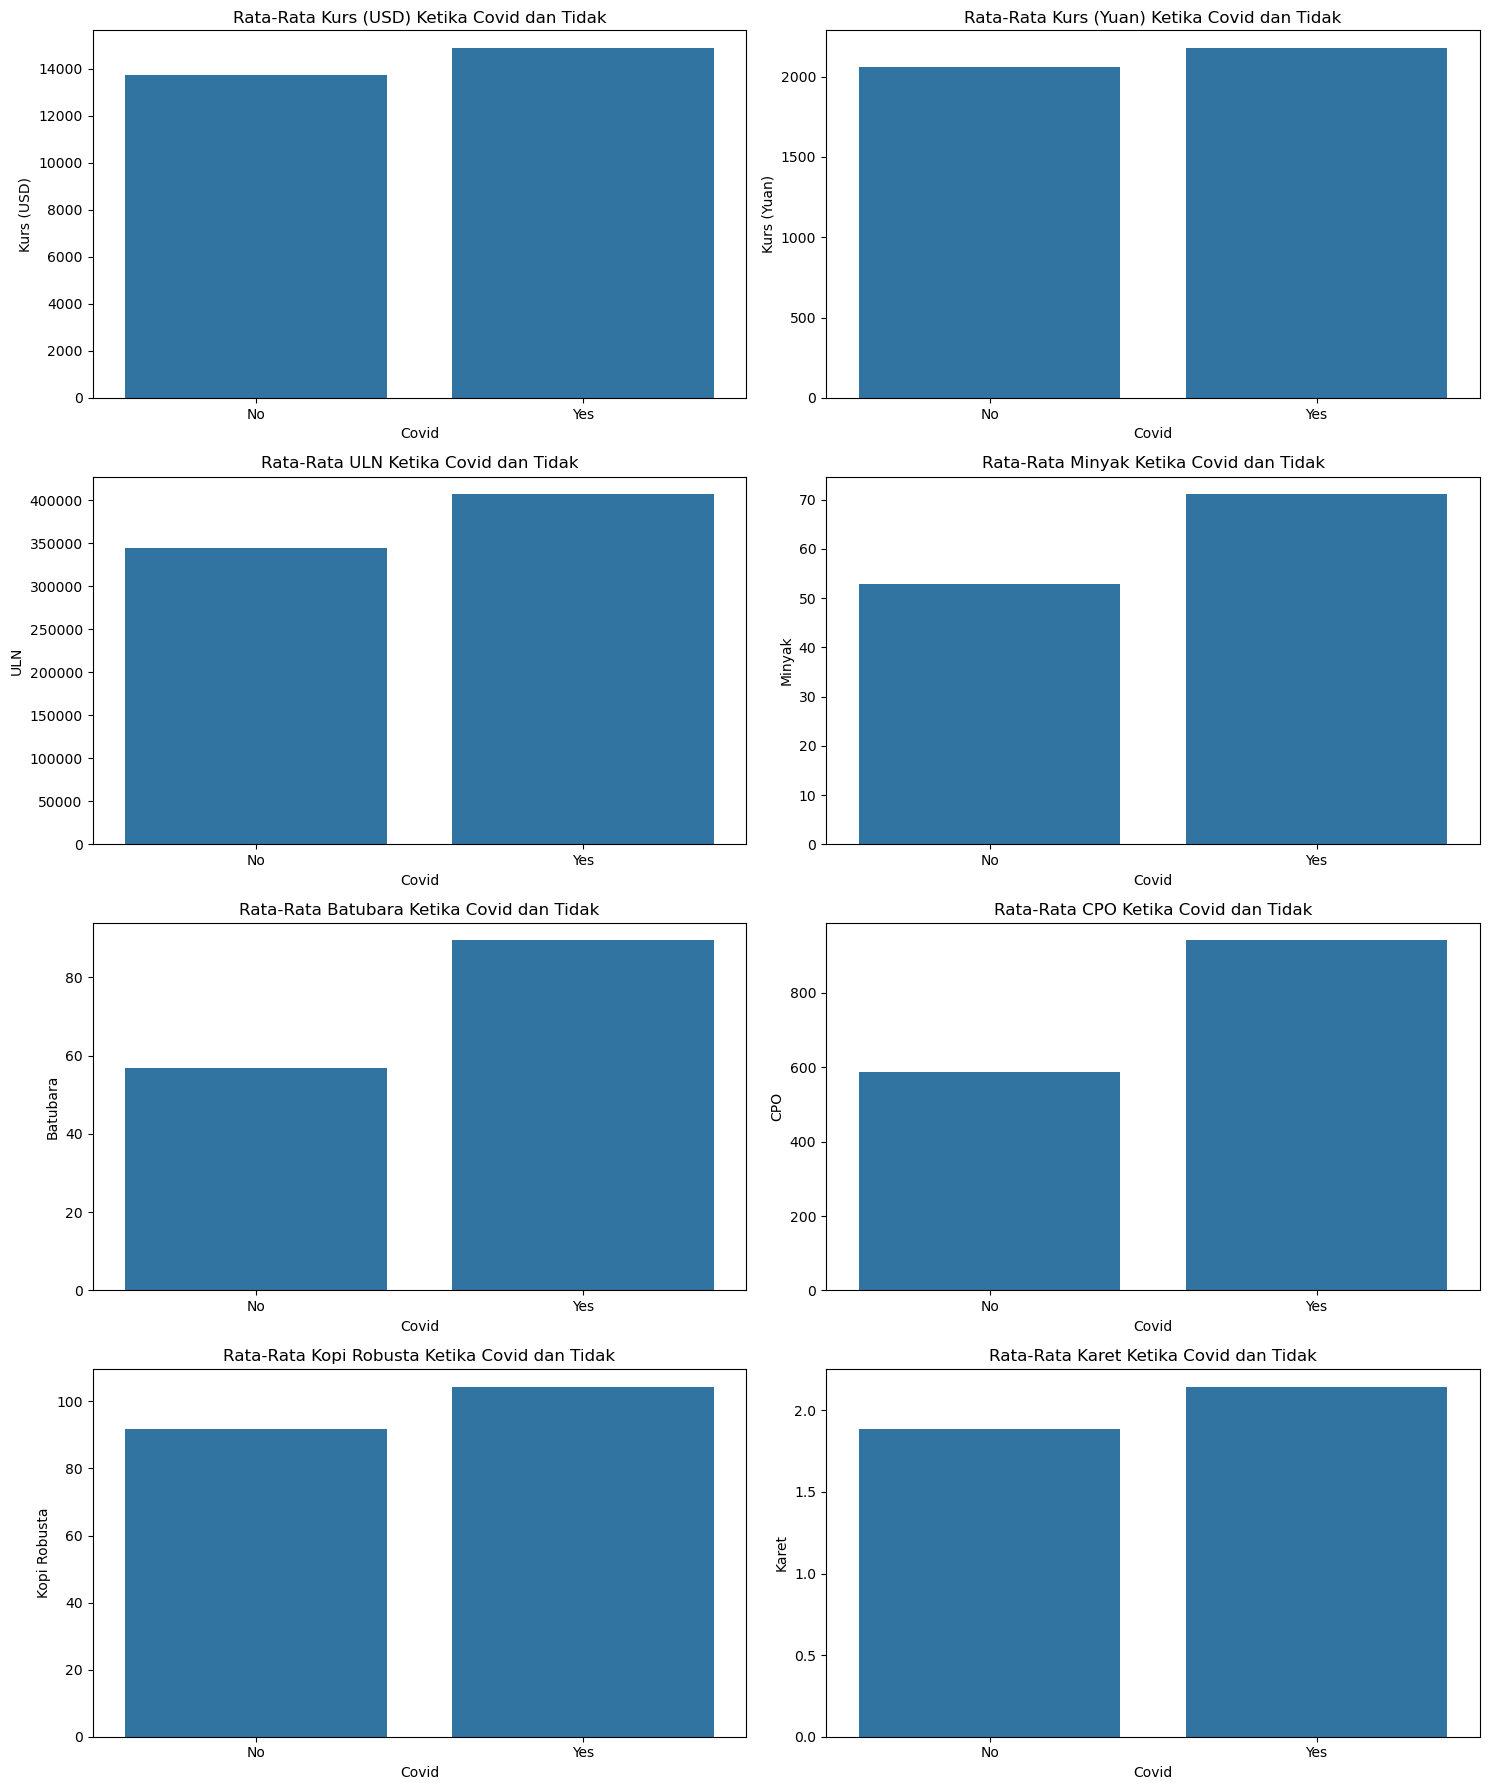

In [53]:
def visualize_by(ax, column):
    data = df.groupby('Covid')[column].mean().reset_index()
    sns.barplot(data=data, x='Covid', y=column, ax=ax)
    ax.set_title(f'Rata-Rata {column} Ketika Covid dan Tidak')
    
fig, axs = plt.subplots(4,2, figsize=(15,18))
for i, col in enumerate(kolom):
    row = i // 2
    col_pos = i % 2
    visualize_by(axs[row, col_pos], col)
    
fig.tight_layout()
plt.show()

# Data Preprocessing

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Tanggal       112 non-null    datetime64[ns]
 1   Kurs (USD)    112 non-null    float64       
 2   ULN           112 non-null    float64       
 3   Minyak        112 non-null    float64       
 4   Batubara      112 non-null    float64       
 5   CPO           112 non-null    float64       
 6   Kopi Robusta  112 non-null    float64       
 7   Karet         112 non-null    float64       
 8   NPL           112 non-null    float64       
 9   LDR           112 non-null    float64       
 10  Kurs (Yuan)   112 non-null    float64       
 11  Covid         112 non-null    object        
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 10.6+ KB


In [56]:
df['Covid'] = df['Covid'].map({'Yes':1, 'No':0})

## Split Data Menjadi Features dan Target

In [58]:
X = df.drop(['LDR', 'NPL', 'Tanggal'], axis=1)
y_npl = df['NPL']
y_ldr = df['LDR']

In [124]:
X

,Kurs (USD),ULN,Minyak,Batubara,CPO,Kopi Robusta,Karet,Kurs (Yuan),Covid
0,12625.0,300508.225476,47.266000,53.927000,638.083810,102.388889,1.803182,2020.052386,0
1,12863.0,300070.301140,50.608947,53.060000,632.131250,103.736842,1.815333,2039.518625,0
2,13084.0,298518.658523,47.783636,53.060000,606.120909,98.136364,1.870000,2092.427500,0
3,12937.0,299954.805787,54.444762,52.940000,593.638636,98.857143,1.894762,2086.650000,0
4,13332.0,302691.669662,59.274500,52.851500,599.990000,94.450000,1.974211,2115.075238,0
...,...,...,...,...,...,...,...,...,...
107,15416.0,408867.613126,72.081000,75.007500,784.888889,139.820000,1.967500,2171.156667,1
108,15796.0,406848.326048,73.930000,77.000000,816.710000,157.280000,2.130000,2177.121196,1
109,15673.0,408199.424439,76.774000,72.912500,827.215000,150.400000,2.440000,2175.819643,1
110,15853.0,404534.602103,80.493500,76.650000,899.331500,171.340000,2.663684,2180.329881,1


# Model Machine Learning

In [126]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, cross_val_score, train_test_split

## Machine Learning untuk Target NPL

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y_npl, test_size=0.3, random_state=42)

dtree = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [136]:
print("R2 Score = ", r2_score(y_test, y_pred))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error = ", mean_squared_error(y_test, y_pred))

R2 Score =  0.3698897825561046
Mean Absolute Error =  0.15151081462045707
Mean Squared Error =  0.04703661473453699


In [140]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)
print("Mean Squared Error terbaik dari GridSearchCV:", -grid_search.best_score_)

Parameter terbaik: {'max_depth': None, 'min_samples_split': 10}
Mean Squared Error terbaik dari GridSearchCV: 0.038593149894670525


In [142]:
dtree = DecisionTreeRegressor(max_depth=None, min_samples_split=10).fit(X_train, y_train)

In [144]:
y_pred = dtree.predict(X_test)

print("R2 Score = ", r2_score(y_test, y_pred))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error = ", mean_squared_error(y_test, y_pred))

R2 Score =  0.2892369429200011
Mean Absolute Error =  0.17145521320571677
Mean Squared Error =  0.05305720675191302


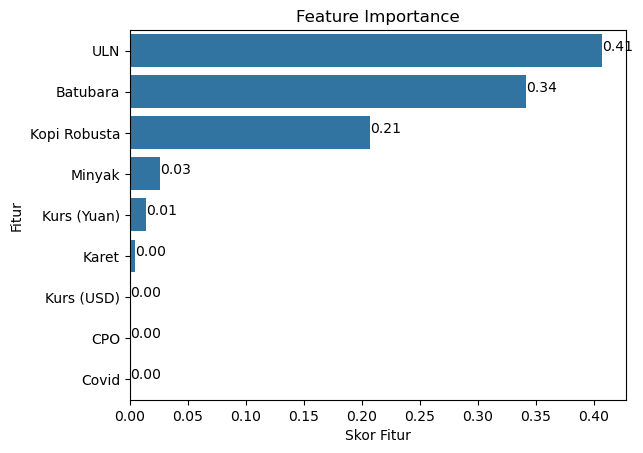

In [146]:
fi = pd.DataFrame()
fi['Fitur'] = X.columns
fi['Skor Fitur'] = dtree.feature_importances_
fi = fi.sort_values(by='Skor Fitur', ascending=False)

ax = sns.barplot(fi, y='Fitur', x='Skor Fitur')
for index, value in enumerate(fi['Skor Fitur']):
    ax.text(value, index, f'{value:.2f}', color='black', ha="left")
plt.title("Feature Importance")
plt.show()

## Machine Learning untuk Target LDR

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ldr, test_size=0.3, random_state=42)

dtree = DecisionTreeRegressor().fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [150]:
print("R2 Score = ", r2_score(y_test, y_pred))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error = ", mean_squared_error(y_test, y_pred))

R2 Score =  0.788190624601835
Mean Absolute Error =  1.4255324620840184
Mean Squared Error =  5.742684671135826


In [152]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Parameter terbaik:", grid_search.best_params_)
print("Mean Squared Error terbaik dari GridSearchCV:", -grid_search.best_score_)

Parameter terbaik: {'max_depth': None, 'min_samples_split': 5}
Mean Squared Error terbaik dari GridSearchCV: 3.256162798128803


In [154]:
dtree = DecisionTreeRegressor(max_depth=None, min_samples_split=5).fit(X_train, y_train)

In [156]:
y_pred = dtree.predict(X_test)

print("R2 Score = ", r2_score(y_test, y_pred))
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error = ", mean_squared_error(y_test, y_pred))

R2 Score =  0.8139117493934872
Mean Absolute Error =  1.4341279565291865
Mean Squared Error =  5.0453203132657976


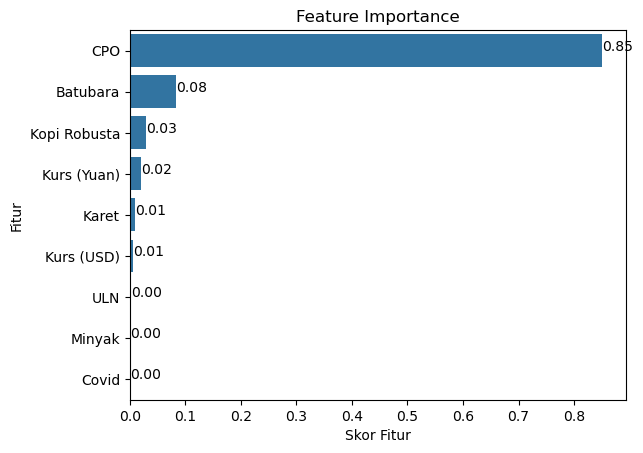

In [158]:
fi = pd.DataFrame()
fi['Fitur'] = X.columns
fi['Skor Fitur'] = dtree.feature_importances_
fi = fi.sort_values(by='Skor Fitur', ascending=False)

ax = sns.barplot(fi, y='Fitur', x='Skor Fitur')
for index, value in enumerate(fi['Skor Fitur']):
    ax.text(value, index, f'{value:.2f}', color='black', ha="left")
plt.title("Feature Importance")
plt.show()